In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import pdb


from aspirin.data.load_data import load_data, load_data_and_submissions
from aspirin.jobs.pipeline import pipeline
from aspirin.features.id_dummies import compute_id_dummies
from aspirin.features.time_features import add_time_columns
from aspirin.features.lag_features import lag_multiseries
from aspirin.features.max_features import max_multiseries
from aspirin.features.min_features import min_multiseries
from aspirin.features.rolling_ewmean_features import rolling_ewmean_multiseries
from aspirin.features.rolling_ewstd_features import rolling_ewstd_multiseries
from aspirin.features.rolling_mean_features import rolling_mean_multiseries
from aspirin.features.rolling_std_features import rolling_std_multiseries
from aspirin.features.slopes_features import slopes_multiseries

In [2]:
data = load_data('../data/Data_Novartis_Datathon-Participants.csv')
print(data.shape)
data.head()

(6300, 8)


Investment 1  Investment 2  Investment 3  \
Cluster   Brand Group    date                                                   
Cluster 1 Brand Group 17 2012-01-01           0.0           0.0           0.0   
                         2012-02-01           0.0           0.0           0.0   
                         2012-03-01           0.0           0.0           0.0   
                         2012-04-01           0.0           0.0           0.0   
                         2012-05-01           0.0           0.0           0.0   

                                     Investment 4  Investment 5  Investment 6  \
Cluster   Brand Group    date                                                   
Cluster 1 Brand Group 17 2012-01-01           0.0           0.0           0.0   
                         2012-02-01           0.0           0.0           0.0   
                         2012-03-01           0.0           0.0           0.0   
                         2012-04-01           0.0           0.0           0.0   
                         2012-05-01           0.0           0.0           0.0   

                                     Sales 1  Sales 2  
Cluster   Brand Group    date                          
Cluster 1 Brand Group 17 2012-01-01      0.0      0.0  
                         2012-02-01      0.0      0.0  
                         2012-03-01      0.0      0.0  
                         2012-04-01      0.0      0.0  
                         2012-05-01      0.0      0.0

In [3]:
data_and_submission = load_data_and_submissions('../data/Data_Novartis_Datathon-Participants.csv', 
                                                '../data/Data_Novartis_Datathon-Results_Challenge1_Template.csv')
print(data_and_submission.shape)
data_and_submission.head()

(6300, 9)


Investment 1  Investment 2  Investment 3  \
Cluster   Brand Group    date                                                   
Cluster 1 Brand Group 17 2012-01-01           0.0           0.0           0.0   
                         2012-02-01           0.0           0.0           0.0   
                         2012-03-01           0.0           0.0           0.0   
                         2012-04-01           0.0           0.0           0.0   
                         2012-05-01           0.0           0.0           0.0   

                                     Investment 4  Investment 5  Investment 6  \
Cluster   Brand Group    date                                                   
Cluster 1 Brand Group 17 2012-01-01           0.0           0.0           0.0   
                         2012-02-01           0.0           0.0           0.0   
                         2012-03-01           0.0           0.0           0.0   
                         2012-04-01           0.0           0.0           0.0   
                         2012-05-01           0.0           0.0           0.0   

                                     Sales 1  Sales 2  submission  
Cluster   Brand Group    date                                      
Cluster 1 Brand Group 17 2012-01-01      0.0      0.0           0  
                         2012-02-01      0.0      0.0           0  
                         2012-03-01      0.0      0.0           0  
                         2012-04-01      0.0      0.0           0  
                         2012-05-01      0.0      0.0           0

In [4]:
submission = pd.read_csv('../data/Data_Novartis_Datathon-Results_Challenge1_Template.csv')
print(submission.shape)
submission.head()

(75, 14)


,Cluster,Brand Group,Jan 2018,Feb 2018,Mar 2018,Apr 2018,May 2018,Jun 2018,Jul 2018,Aug 2018,Sep 2018,Oct 2018,Nov 2018,Dec 2018
0,Cluster 1,Brand Group 17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cluster 2,Brand Group 17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cluster 3,Brand Group 17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Cluster 4,Brand Group 17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cluster 5,Brand Group 17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
feature_funcs = [add_time_columns, compute_id_dummies, lag_multiseries]
feature_matrix = pipeline(data_and_submission, features=feature_funcs)
feature_matrix = feature_matrix.join(data_and_submission)
print(feature_matrix.shape)
feature_matrix.head()

(6300, 90)


year  month  daysinmonth     month_sin  \
Cluster   Brand Group    date                                                 
Cluster 1 Brand Group 17 2012-01-01  2012      1           31 -2.041078e-17   
                         2012-02-01  2012      2           29 -4.082156e-17   
                         2012-03-01  2012      3           31 -6.123234e-17   
                         2012-04-01  2012      4           30 -8.164312e-17   
                         2012-05-01  2012      5           31 -1.020539e-16   

                                     cos_month  season    season_sin  \
Cluster   Brand Group    date                                          
Cluster 1 Brand Group 17 2012-01-01   0.083333       1 -6.123234e-17   
                         2012-02-01   0.083333       1 -6.123234e-17   
                         2012-03-01   0.083333       2 -1.224647e-16   
                         2012-04-01   0.083333       2 -1.224647e-16   
                         2012-05-01   0.083333       2 -1.224647e-16   

                                       season_cos  year_2013  year_2014  \
Cluster   Brand Group    date                                             
Cluster 1 Brand Group 17 2012-01-01 -6.123234e-17          0          0   
                         2012-02-01 -6.123234e-17          0          0   
                         2012-03-01 -1.224647e-16          0          0   
                         2012-04-01 -1.224647e-16          0          0   
                         2012-05-01 -1.224647e-16          0          0   

                                        ...      Sales 2_lag_12  Investment 1  \
Cluster   Brand Group    date           ...                                     
Cluster 1 Brand Group 17 2012-01-01     ...                 NaN           0.0   
                         2012-02-01     ...                 NaN           0.0   
                         2012-03-01     ...                 NaN           0.0   
                         2012-04-01     ...                 NaN           0.0   
                         2012-05-01     ...                 NaN           0.0   

                                     Investment 2  Investment 3  Investment 4  \
Cluster   Brand Group    date                                                   
Cluster 1 Brand Group 17 2012-01-01           0.0           0.0           0.0   
                         2012-02-01           0.0           0.0           0.0   
                         2012-03-01           0.0           0.0           0.0   
                         2012-04-01           0.0           0.0           0.0   
                         2012-05-01           0.0           0.0           0.0   

                                     Investment 5  Investment 6  Sales 1  \
Cluster   Brand Group    date                                              
Cluster 1 Brand Group 17 2012-01-01           0.0           0.0      0.0   
                         2012-02-01           0.0           0.0      0.0   
                         2012-03-01           0.0           0.0      0.0   
                         2012-04-01           0.0           0.0      0.0   
                         2012-05-01           0.0           0.0      0.0   

                                     Sales 2  submission  
Cluster   Brand Group    date                             
Cluster 1 Brand Group 17 2012-01-01      0.0           0  
                         2012-02-01      0.0           0  
                         2012-03-01      0.0           0  
                         2012-04-01      0.0           0  
                         2012-05-01      0.0           0  

[5 rows x 90 columns]

In [6]:
feature_matrix.columns

Index(['year', 'month', 'daysinmonth', 'month_sin', 'cos_month', 'season',
       'season_sin', 'season_cos', 'year_2013', 'year_2014', 'year_2015',
       'year_2016', 'year_2017', 'year_2018', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'season_2', 'season_3', 'season_4',
       'Brand Group_Brand Group 17', 'Brand Group_Brand Group 24',
       'Brand Group_Brand Group 30', 'Brand Group_Brand Group 31',
       'Brand Group_Brand Group 36', 'Brand Group_Brand Group 41',
       'Brand Group_Brand Group 51, 73, 90', 'Brand Group_Brand Group 96 97',
       'Brand Group_others', 'Cluster_Cluster 1', 'Cluster_Cluster 10',
       'Cluster_Cluster 2', 'Cluster_Cluster 3', 'Cluster_Cluster 4',
       'Cluster_Cluster 5', 'Cluster_Cluster 7', 'Cluster_Cluster 8',
       'Cluster_Cluster 9', 'Investment 1_lag_1', 'Investment 2_lag_1',
       'Investment 3_lag_1', 'Investment 4_lag_1', 'Investment 5_lag

In [7]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
    
def validate_single_model(data, model):
    '''
    '''
    list_mapes = []
    X = data.drop('Sales 2', axis=1)
    y = data['Sales 2']
    tscv = TimeSeriesSplit(n_splits=6)
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        list_mapes.append(mean_absolute_error(y_test+1e-2, y_pred))
        
    return list_mapes

In [8]:
def validate_multiple_models(data, models):
    errors_dict = dict()
    count = 0
    for model, parameters in models:
        model = model(**parameters)
        errors_dict[model.__class__.__name__ + str(parameters)] = validate_single_model(data, model)
        count += 1
    
    return errors_dict

In [13]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

models = [(XGBRegressor, {'n_estimators':10}),
          (XGBRegressor, {'n_estimators':100})]

validate_multiple_models(feature_matrix, models)

{"XGBRegressor{'n_estimators': 100}": [1328.8214890304516,
  4220.2362299000215,
  770.440618182115,
  93.82826925174804,
  249.85827210252936,
  1189.7634195674507],
 "XGBRegressor{'n_estimators': 10}": [1983.4064556216058,
  7116.195680871919,
  2781.131419900035,
  413.131043859491,
  1002.633933710034,
  1034.6996702838087]}

In [26]:
import operator
from sklearn.feature_selection import mutual_info_regression

def compute_mutual_information_importance(data, target, k):
    X = data.drop(target, axis=1)
    y = data[target]
    mi = mutual_info_regression(X, y)
    mi_dict = dict(zip(X.columns, mi))
    sorted_mi_dict = sorted(mi_dict.items(), key=operator.itemgetter(1), reverse=True)
    return [i[0] for i in sorted_mi_dict[:k]]
    
    

In [28]:
compute_mutual_information_importance(feature_matrix.interpolate().fillna(method='ffill').fillna(method='bfill'), 
                                      'Sales 2', 50)

['Sales 1',
 'Sales 2_lag_1',
 'Sales 2_lag_2',
 'Sales 2_lag_3',
 'Sales 2_lag_6',
 'Sales 2_lag_12',
 'Investment 1_lag_3',
 'Investment 1',
 'Investment 1_lag_6',
 'Investment 1_lag_12',
 'Investment 1_lag_1',
 'Investment 1_lag_2',
 'Investment 6_lag_1',
 'Investment 6_lag_2',
 'Investment 6',
 'Investment 6_lag_6',
 'Investment 6_lag_3',
 'Investment 6_lag_12',
 'year',
 'Investment 2_lag_12',
 'Investment 2',
 'Investment 2_lag_6',
 'Investment 2_lag_1',
 'Investment 2_lag_2',
 'Investment 4',
 'Investment 2_lag_3',
 'Investment 4_lag_1',
 'Investment 4_lag_3',
 'Investment 4_lag_2',
 'Investment 4_lag_6',
 'submission',
 'year_2018',
 'Investment 4_lag_12',
 'Brand Group_others',
 'Cluster_Cluster 1',
 'Brand Group_Brand Group 36',
 'Investment 3',
 'Brand Group_Brand Group 24',
 'Investment 5_lag_1',
 'Cluster_Cluster 2',
 'Investment 5',
 'Cluster_Cluster 3',
 'Investment 3_lag_1',
 'Investment 3_lag_3',
 'Cluster_Cluster 5',
 'Investment 3_lag_2',
 'Investment 5_lag_3',
 'yea

Feature selection for Sales 2


/Users/feliuserraburriel/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:292: RuntimeWarning: invalid value encountered in sqrt
  n_samples * X_means ** 2)
/Users/feliuserraburriel/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/feliuserraburriel/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/feliuserraburriel/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/feliuserraburriel/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


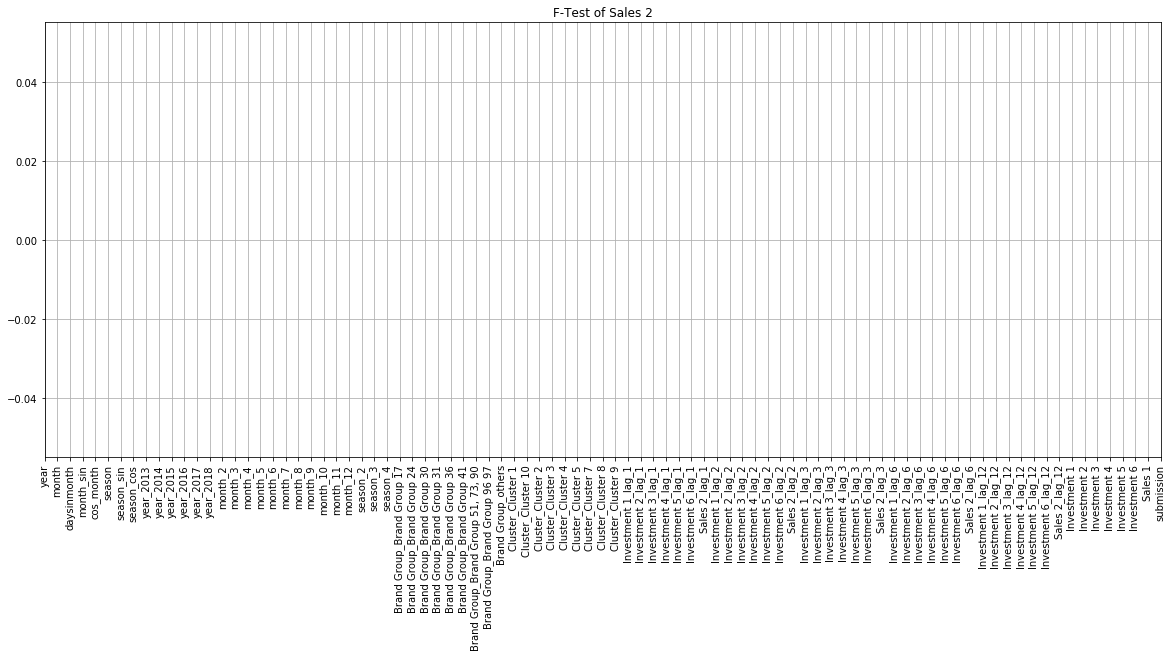

MI


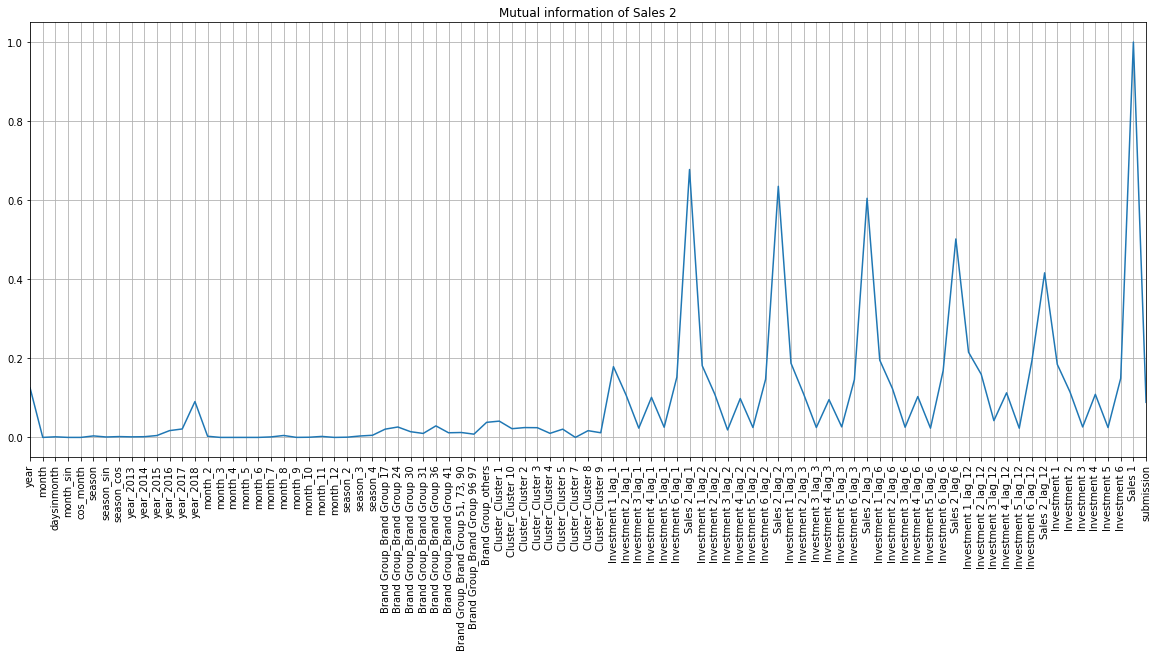

Storing the results of Sales 2.


In [12]:
from numpy import max
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression

all_dicts_miv = dict()
all_dicts_f_test = dict()
i = 'Sales 2'
print('Feature selection for {}'.format(i))
df = feature_matrix
# --
X = df.fillna(method='ffill').fillna(method='bfill').drop([i], axis=1)
y = df[i].fillna(method='ffill').fillna(method='bfill')

f_test, _ = f_regression(X, y)
f_test /= max(f_test)


plt.figure(figsize=(20, 8))
plt.plot(f_test)
plt.grid(True)
plt.title('F-Test of {}'.format(y.name))
plt.xticks(range(len(X.columns.tolist())), X.columns.tolist(), rotation = 90)
plt.xlim([0, len(X.columns.tolist()) -1])
plt.show()

print('MI')

mi = mutual_info_regression(X, y)
mi /= max(mi)

plt.figure(figsize=(20, 8))
plt.plot(mi)
plt.grid(True)
plt.title('Mutual information of {}'.format(y.name))
plt.xticks(range(len(X.columns.tolist())), X.columns.tolist(), rotation = 90)
plt.xlim([0, len(X.columns.tolist()) -1])
plt.show()

# --

print('Storing the results of {}.'.format(i))
dict_miv = dict()
dict_f_test = dict()
for j in range(len(df.columns.values) - 1):
    dict_miv[str(df.columns.values[j])] = mi[j]
    dict_f_test[str(df.columns.values[j])] = f_test[j]

all_dicts_miv[str(i)] = dict_miv
all_dicts_f_test[str(i)] = dict_f_test

In [37]:
from xgboost import XGBRegressor
from matplotlib import pyplot as plt

bst = XGBRegressor(num_estimators=)

def make_prediction(data, model):
    model.fit(data.loc[data['submission'] == 0].drop(['Sales 1', 'Sales 2', 'submission'], axis=1).values, data.loc[data['submission'] == 0, 'Sales 2'].values)
    predictions = model.predict(data.loc[data['submission'] == 1].drop(['Sales 1', 'Sales 2', 'submission'], axis=1).values)
    predictions = pd.DataFrame(predictions, index=data.loc[data['submission'] == 1].index).reset_index()
    return predictions

predictions = make_prediction(feature_matrix, bst)

In [38]:
import calendar

def predictions_to_submission(predictions, submission):
    predictions['date'] = predictions['date'].apply(lambda x: f'{calendar.month_abbr[x.month]} {x.year}')
    for i, row in submission.iterrows():
        for key in row.keys():
            if key not in ['Cluster', 'Brand Group']:
                submission.loc[(submission['Cluster'] == row['Cluster']) & (submission['Brand Group'] == row['Brand Group']), key] = \
                    predictions.loc[(predictions['Cluster'] == row['Cluster']) & (predictions['date'] == key) & (predictions['Brand Group'] == row['Brand Group']), 0].values
    submission['Cluster'] = submission['Cluster'].astype(str)
    submission['Cluster'] = submission['Cluster'].astype(str)
    return submission

submission_template = pd.read_csv('../data/Data_Novartis_Datathon-Results_Challenge1_Template.csv')
submission = predictions_to_submission(predictions, submission_template.copy())
print(submission.shape)
print(submission_template.shape)
submission.head()

(75, 14)
(75, 14)


,Cluster,Brand Group,Jan 2018,Feb 2018,Mar 2018,Apr 2018,May 2018,Jun 2018,Jul 2018,Aug 2018,Sep 2018,Oct 2018,Nov 2018,Dec 2018
0,Cluster 1,Brand Group 17,209.396088,101.907799,51.829933,51.829933,51.829933,51.829933,78.907860,-18.852573,51.829933,-466.234833,62.181076,-53.733978
1,Cluster 2,Brand Group 17,6604.022461,2635.114014,806.671387,-95.413185,-77.029884,129.237762,-81.320839,91.205269,-1186.886597,100.172539,452.218475,-1341.542603
2,Cluster 3,Brand Group 17,26294.957031,11531.279297,3717.679199,2358.139893,2308.760010,2526.851807,2762.197266,1211.047729,1100.440918,1255.147827,891.300171,-19.202007
3,Cluster 4,Brand Group 17,7042.878906,3271.193359,1583.527466,1053.890869,834.931091,834.931091,787.037598,-115.547668,675.948364,1188.363892,1062.441162,943.052429
4,Cluster 5,Brand Group 17,1565.639282,731.966370,-285.474548,153.222809,237.217957,202.234589,-176.965164,8.784756,-48.147755,153.222809,237.217957,132.168198


In [39]:
submission.to_csv('../data/naive_xgb_with_investment_and_dates_12_lags.csv', index=False)

In [245]:
predictions_pivoted = pd.pivot_table(predictions, columns='date', index=['Cluster', 'Brand Group'])
predictions_pivoted.head()

0                                         \
date                         Apr 2018     Aug 2018     Dec 2018     Feb 2018   
Cluster   Brand Group                                                          
Cluster 1 Brand Group 17  -695.915222  -695.915222  -695.915222  -695.915222   
          Brand Group 24  -832.346252  -832.346252  -832.346252  -832.346252   
          Brand Group 30  -371.861847  -371.861847  -371.861847  -371.861847   
          Brand Group 31  1321.273438  1321.273438  1321.273438  1321.273438   
          Brand Group 36 -1016.321777 -1016.321777 -1016.321777 -1016.321777   

                                                                              \
date                         Jan 2018     Jul 2018     Jun 2018     Mar 2018   
Cluster   Brand Group                                                          
Cluster 1 Brand Group 17  -695.915222  -695.915222  -695.915222  -695.915222   
          Brand Group 24  -832.346252  -832.346252  -832.346252  -832.346252   
          Brand Group 30  -371.861847  -371.861847  -371.861847  -371.861847   
          Brand Group 31  1321.273438  1321.273438  1321.273438  1321.273438   
          Brand Group 36 -1016.321777 -1016.321777 -1016.321777 -1016.321777   

                                                                              
date                         May 2018     Nov 2018     Oct 2018     Sep 2018  
Cluster   Brand Group                                                         
Cluster 1 Brand Group 17  -695.915222  -695.915222  -695.915222  -695.915222  
          Brand Group 24  -832.346252  -832.346252  -832.346252  -832.346252  
          Brand Group 30  -371.861847  -371.861847  -371.861847  -371.861847  
          Brand Group 31  1321.273438  1321.273438  1321.273438  1321.273438  
          Brand Group 36 -1016.321777 -1016.321777 -1016.321777 -1016.321777

In [241]:
predictions_pivoted = pd.pivot_table(predictions, columns='date', index=['Cluster', 'Brand Group'])
predictions_pivoted.columns = [col[1] for col in predictions_pivoted.columns]
predictions_pivoted.head()

Apr 2018     Aug 2018     Dec 2018     Feb 2018  \
Cluster   Brand Group                                                          
Cluster 1 Brand Group 17  -695.915222  -695.915222  -695.915222  -695.915222   
          Brand Group 24  -832.346252  -832.346252  -832.346252  -832.346252   
          Brand Group 30  -371.861847  -371.861847  -371.861847  -371.861847   
          Brand Group 31  1321.273438  1321.273438  1321.273438  1321.273438   
          Brand Group 36 -1016.321777 -1016.321777 -1016.321777 -1016.321777   

                             Jan 2018     Jul 2018     Jun 2018     Mar 2018  \
Cluster   Brand Group                                                          
Cluster 1 Brand Group 17  -695.915222  -695.915222  -695.915222  -695.915222   
          Brand Group 24  -832.346252  -832.346252  -832.346252  -832.346252   
          Brand Group 30  -371.861847  -371.861847  -371.861847  -371.861847   
          Brand Group 31  1321.273438  1321.273438  1321.273438  1321.273438   
          Brand Group 36 -1016.321777 -1016.321777 -1016.321777 -1016.321777   

                             May 2018     Nov 2018     Oct 2018     Sep 2018  
Cluster   Brand Group                                                         
Cluster 1 Brand Group 17  -695.915222  -695.915222  -695.915222  -695.915222  
          Brand Group 24  -832.346252  -832.346252  -832.346252  -832.346252  
          Brand Group 30  -371.861847  -371.861847  -371.861847  -371.861847  
          Brand Group 31  1321.273438  1321.273438  1321.273438  1321.273438  
          Brand Group 36 -1016.321777 -1016.321777 -1016.321777 -1016.321777

In [243]:
predictions_pivoted.to_csv('../data/naive_xgb.csv')

In [177]:
data.loc[data['submission'] == 0, dummy_cols].head()

Cluster_Cluster 1  Cluster_Cluster 10  \
Cluster   Brand Group    date                                                
Cluster 1 Brand Group 12 2012-01-01                  1                   0   
                         2012-02-01                  1                   0   
                         2012-03-01                  1                   0   
                         2012-04-01                  1                   0   
                         2012-05-01                  1                   0   

                                     Cluster_Cluster 2  Cluster_Cluster 3  \
Cluster   Brand Group    date                                               
Cluster 1 Brand Group 12 2012-01-01                  0                  0   
                         2012-02-01                  0                  0   
                         2012-03-01                  0                  0   
                         2012-04-01                  0                  0   
                         2012-05-01                  0                  0   

                                     Cluster_Cluster 4  Cluster_Cluster 5  \
Cluster   Brand Group    date                                               
Cluster 1 Brand Group 12 2012-01-01                  0                  0   
                         2012-02-01                  0                  0   
                         2012-03-01                  0                  0   
                         2012-04-01                  0                  0   
                         2012-05-01                  0                  0   

                                     Cluster_Cluster 7  Cluster_Cluster 8  \
Cluster   Brand Group    date                                               
Cluster 1 Brand Group 12 2012-01-01                  0                  0   
                         2012-02-01                  0                  0   
                         2012-03-01                  0                  0   
                         2012-04-01                  0                  0   
                         2012-05-01                  0                  0   

                                     Cluster_Cluster 9  \
Cluster   Brand Group    date                            
Cluster 1 Brand Group 12 2012-01-01                  0   
                         2012-02-01                  0   
                         2012-03-01                  0   
                         2012-04-01                  0   
                         2012-05-01                  0   

                                     Brand Group_Brand Group 12  \
Cluster   Brand Group    date                                     
Cluster 1 Brand Group 12 2012-01-01                           1   
                         2012-02-01                           1   
                         2012-03-01                           1   
                         2012-04-01                           1   
                         2012-05-01                           1   

                                            ...          \
Cluster   Brand Group    date               ...           
Cluster 1 Brand Group 12 2012-01-01         ...           
                         2012-02-01         ...           
                         2012-03-01         ...           
                         2012-04-01         ...           
                         2012-05-01         ...           

                                     Brand Group_Brand Group 87  \
Cluster   Brand Group    date                                     
Cluster 1 Brand Group 12 2012-01-01                           0   
                         2012-02-01                           0   
                         2012-03-01                           0   
                         2012-04-01                           0   
                         2012-05-01                           0   

                                     Brand Group_Brand Group 89  \
Cluster   Brand Group    date             

In [ ]:
[17, 24, 30, 31, 36, 41, 51, 73, 90, 96, 97, 'others']

In [181]:
data.loc[data['submission'] == 1, dummy_cols].mean()

Cluster_Cluster 1                     0.120000
Cluster_Cluster 10                    0.120000
Cluster_Cluster 2                     0.106667
Cluster_Cluster 3                     0.106667
Cluster_Cluster 4                     0.120000
Cluster_Cluster 5                     0.120000
Cluster_Cluster 7                     0.066667
Cluster_Cluster 8                     0.120000
Cluster_Cluster 9                     0.120000
Brand Group_Brand Group 12            0.000000
Brand Group_Brand Group 13            0.000000
Brand Group_Brand Group 15            0.000000
Brand Group_Brand Group 16            0.000000
Brand Group_Brand Group 17            0.106667
Brand Group_Brand Group 18            0.000000
Brand Group_Brand Group 19            0.000000
Brand Group_Brand Group 20            0.000000
Brand Group_Brand Group 21            0.000000
Brand Group_Brand Group 24            0.093333
Brand Group_Brand Group 25            0.000000
Brand Group_Brand Group 26            0.000000
Brand Group_B

In [173]:
data.loc[data['submission'] == 0, 'Sales 2'].describe()

count    21816.000000
mean      1194.612841
std       3258.900536
min     -14968.811000
25%         35.353686
50%        186.751990
75%        923.874730
max      40263.423390
Name: Sales 2, dtype: float64

/Users/yc00031/.virtualenvs/py3/lib/python3.7/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/yc00031/.virtualenvs/py3/lib/python3.7/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([   8.,    6., 4537.,  956.,  298.,  107.,  184.,  130.,   48.,
          14.]),
 array([-15438.43038796,  -9078.63866644,  -2718.84694492,   3640.94477661,
         10000.73649813,  16360.52821966,  22720.31994118,  29080.1116627 ,
         35439.90338423,  41799.69510575,  48159.48682727]),
 <a list of 10 Patch objects>)

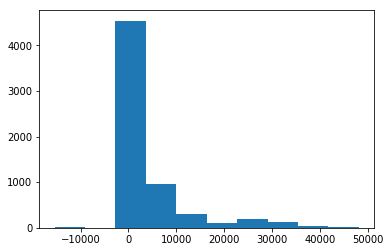

In [223]:
plt.hist(data['Sales 2'])

(array([504., 120., 156.,  36.,   0.,  12.,  36.,   0.,  12.,  24.]),
 array([-1016.32177734,  2428.69086914,  5873.70351563,  9318.71616211,
        12763.72880859, 16208.74145508, 19653.75410156, 23098.76674805,
        26543.77939453, 29988.79204102, 33433.8046875 ]),
 <a list of 10 Patch objects>)

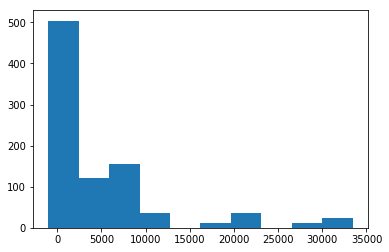

In [222]:
plt.hist(predictions)

In [224]:
predictions

array([-6.9591522e+02, -6.9591522e+02, -6.9591522e+02, -6.9591522e+02,
       -6.9591522e+02, -6.9591522e+02, -6.9591522e+02, -6.9591522e+02,
       -6.9591522e+02, -6.9591522e+02, -6.9591522e+02, -6.9591522e+02,
       -8.3234625e+02, -8.3234625e+02, -8.3234625e+02, -8.3234625e+02,
       -8.3234625e+02, -8.3234625e+02, -8.3234625e+02, -8.3234625e+02,
       -8.3234625e+02, -8.3234625e+02, -8.3234625e+02, -8.3234625e+02,
       -3.7186185e+02, -3.7186185e+02, -3.7186185e+02, -3.7186185e+02,
       -3.7186185e+02, -3.7186185e+02, -3.7186185e+02, -3.7186185e+02,
       -3.7186185e+02, -3.7186185e+02, -3.7186185e+02, -3.7186185e+02,
        1.3212734e+03,  1.3212734e+03,  1.3212734e+03,  1.3212734e+03,
        1.3212734e+03,  1.3212734e+03,  1.3212734e+03,  1.3212734e+03,
        1.3212734e+03,  1.3212734e+03,  1.3212734e+03,  1.3212734e+03,
       -1.0163218e+03, -1.0163218e+03, -1.0163218e+03, -1.0163218e+03,
       -1.0163218e+03, -1.0163218e+03, -1.0163218e+03, -1.0163218e+03,
      

In [119]:
submission_template = pd.read_csv('../data/Data_Novartis_Datathon-Results_Challenge1_Template.csv')

In [120]:
submission_template.head()

,Cluster,Brand Group,Jan 2018,Feb 2018,Mar 2018,Apr 2018,May 2018,Jun 2018,Jul 2018,Aug 2018,Sep 2018,Oct 2018,Nov 2018,Dec 2018
0,Cluster 1,Brand Group 17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cluster 2,Brand Group 17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cluster 3,Brand Group 17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Cluster 4,Brand Group 17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cluster 5,Brand Group 17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
data['Sales 2'].mean()

485.39632050722906

In [78]:
submission = submission_template.fillna(data['Sales 2'].mean())
submission.to_csv('../data/submission_mean.csv', index=False)

In [79]:
index_cols = ['Cluster', 'Brand Group']
value_vars = [col for col in submission_template if col not in index_cols]
submission_template_reshaped = pd.melt(submission_template, id_vars=index_cols, value_vars=value_vars)
submission_template_reshaped = submission_template_reshaped.rename(columns={'value': 'prediction'})
submission_template_reshaped['year'] = submission_template_reshaped['variable'].apply(lambda x: x.split(' ')[1])
submission_template_reshaped['month'] = submission_template_reshaped['variable'].apply(lambda x: x.split(' ')[0])
submission_template_reshaped['month_num'] = submission_template_reshaped['month'].map(month_dict)
submission_template_reshaped['date'] = submission_template_reshaped.apply(lambda x: pd.Timestamp(year=int(x['year']), month=int(x['month_num']), day=1), axis=1)

#data = pd.melt(data, id_vars=index_cols,value_vars=date_cols)


In [81]:
submission_template_reshaped.head()

,Cluster,Brand Group,variable,prediction,year,month,month_num,date
0,Cluster 1,Brand Group 17,Jan 2018,NaN,2018,Jan,1,2018-01-01
1,Cluster 2,Brand Group 17,Jan 2018,NaN,2018,Jan,1,2018-01-01
2,Cluster 3,Brand Group 17,Jan 2018,NaN,2018,Jan,1,2018-01-01
3,Cluster 4,Brand Group 17,Jan 2018,NaN,2018,Jan,1,2018-01-01
4,Cluster 5,Brand Group 17,Jan 2018,NaN,2018,Jan,1,2018-01-01


In [93]:
group_means = data.groupby(index_cols)['Sales 2'].mean()
def fillnas(values, group_means):
    _values = values.set_index(index_cols)
    return group_means[_values.index]

submission_template_reshaped['prediction'] = submission_template_reshaped.groupby(index_cols).apply(lambda x: fillnas(x, group_means))

Exception: cannot handle a non-unique multi-index!

In [55]:
submission = pd.DataFrame(index=submiss)

In [58]:
submission['prediction'] = 0

In [59]:
submission.head()

prediction
Cluster   Brand Group    Country    date                  
Cluster 1 Brand Group 12 Country 10 2012-04-01           0
                                    2013-04-01           0
                                    2014-04-01           0
                                    2015-04-01           0
                                    2016-04-01           0